In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
F1 = pd.read_csv('complete.csv')

C:\Users\E7490\AppData\Local\Temp\ipykernel_13640\3348382729.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='points', y='driver_name', data=top_driver_points, palette='viridis')


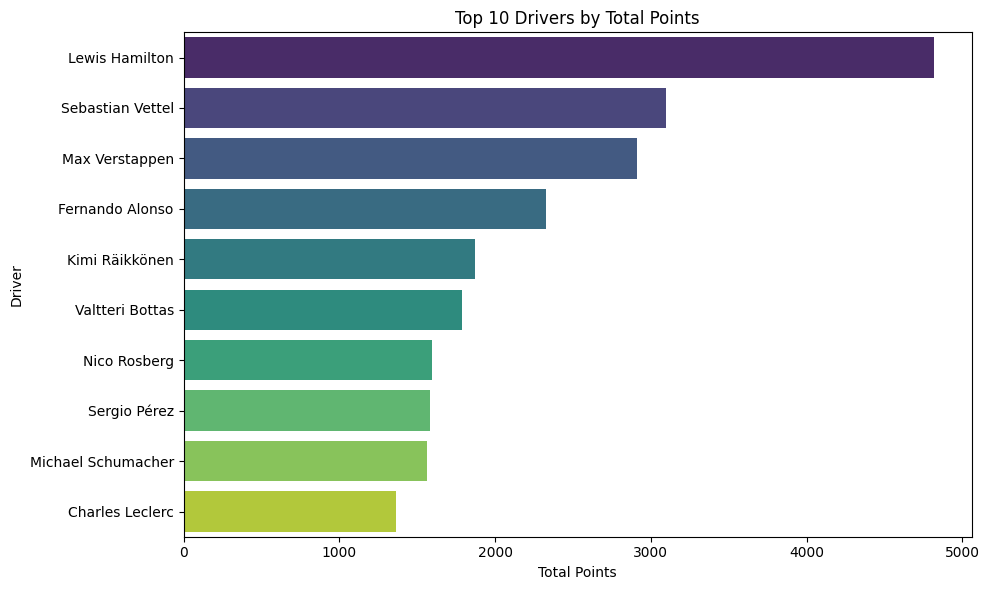

In [16]:
# Sum total points by driverId
top_driver_points = F1.groupby('driverId')['points'].sum().sort_values(ascending=False).head(10).reset_index()

# Merge with driver names
top_driver_points = top_driver_points.merge(F1[['driverId', 'forename', 'surname']], on='driverId', how='left')

# Create full name column
top_driver_points['driver_name'] = top_driver_points['forename'] + ' ' + top_driver_points['surname']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='points', y='driver_name', data=top_driver_points, palette='viridis')
plt.title('Top 10 Drivers by Total Points')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

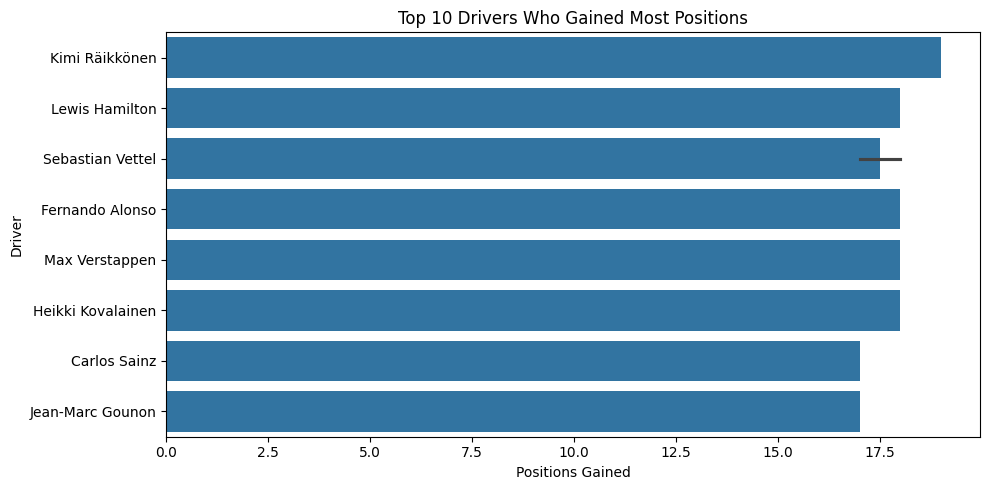

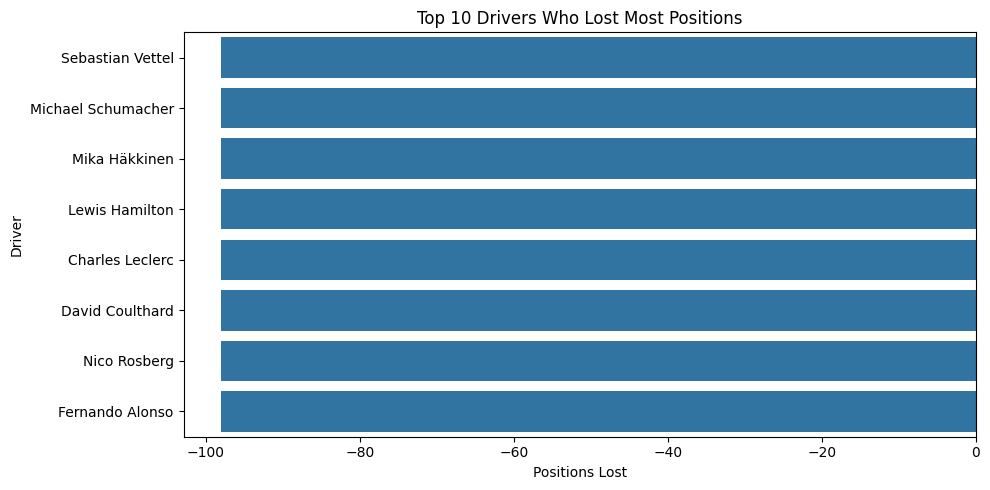

In [21]:
# Merge driver names
F1_named = F1
F1_named['driver_name'] = F1_named['forename'] + ' ' + F1_named['surname']

# Create position change
F1_named['qualifying_position'] = pd.to_numeric(F1_named['qualifying_position'], errors='coerce')
F1_named['final_position'] = pd.to_numeric(F1_named['final_position'], errors='coerce')
F1_named['position_change'] = F1_named['qualifying_position'] - F1_named['final_position']

# Gainers & losers
top_gainers = F1_named.sort_values('position_change', ascending=False).head(10)
top_losers = F1_named.sort_values('position_change').head(10)

# Plots
plt.figure(figsize=(10, 5))
sns.barplot(x='position_change', y='driver_name', data=top_gainers)
plt.title('Top 10 Drivers Who Gained Most Positions')
plt.xlabel('Positions Gained')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='position_change', y='driver_name', data=top_losers)
plt.title('Top 10 Drivers Who Lost Most Positions')
plt.xlabel('Positions Lost')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()


C:\Users\E7490\AppData\Local\Temp\ipykernel_13640\3113453285.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='points', y='constructor_name', data=team_points.head(10), palette='crest')


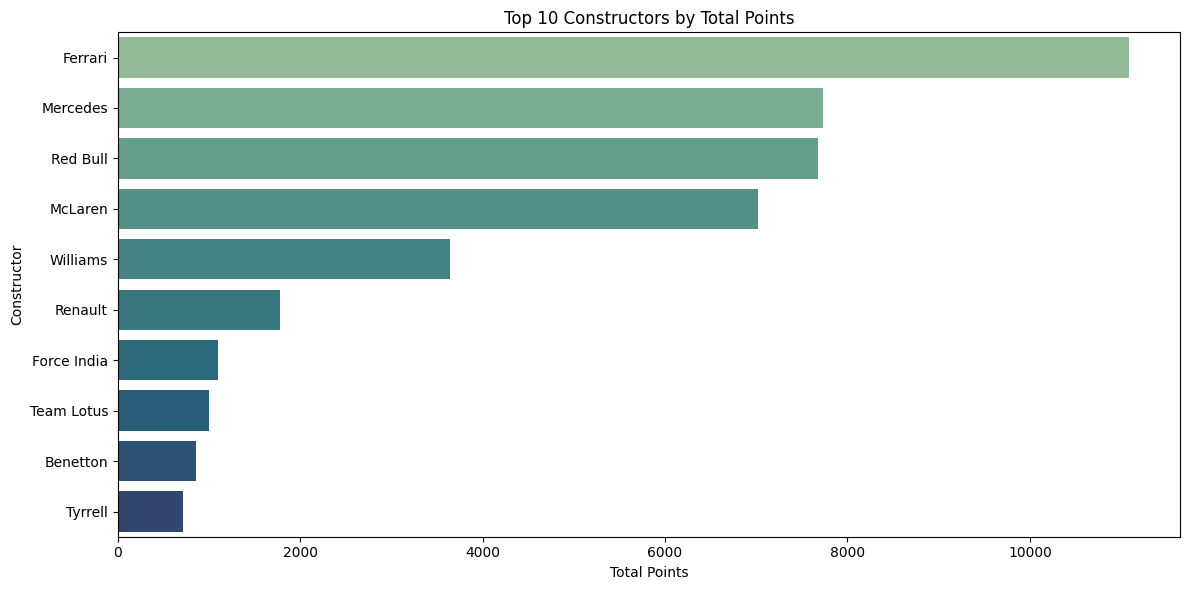

In [23]:
# Sum total points per constructor
team_points = F1_named.groupby('constructor_name')['points'].sum().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='points', y='constructor_name', data=team_points.head(10), palette='crest')
plt.title('Top 10 Constructors by Total Points')
plt.xlabel('Total Points')
plt.ylabel('Constructor')
plt.tight_layout()
plt.show()


C:\Users\E7490\AppData\Local\Temp\ipykernel_13640\2171760820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=red_bull_top.values, y=red_bull_top.index, palette='rocket')


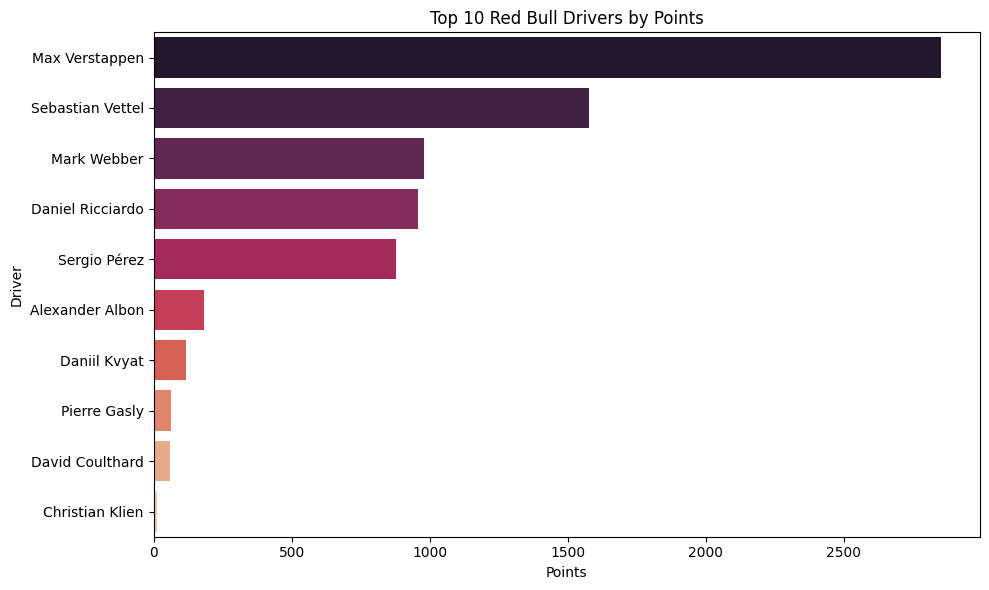

In [ ]:
# Top drivers for Red Bull
red_bull_drivers = F1_named[F1_named['constructor_name'] == 'Red Bull']
red_bull_top = red_bull_drivers.groupby('driver_name')['points'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=red_bull_top.values, y=red_bull_top.index, palette='rocket')
plt.title('Top 10 Red Bull Drivers by Points')
plt.xlabel('Points')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()


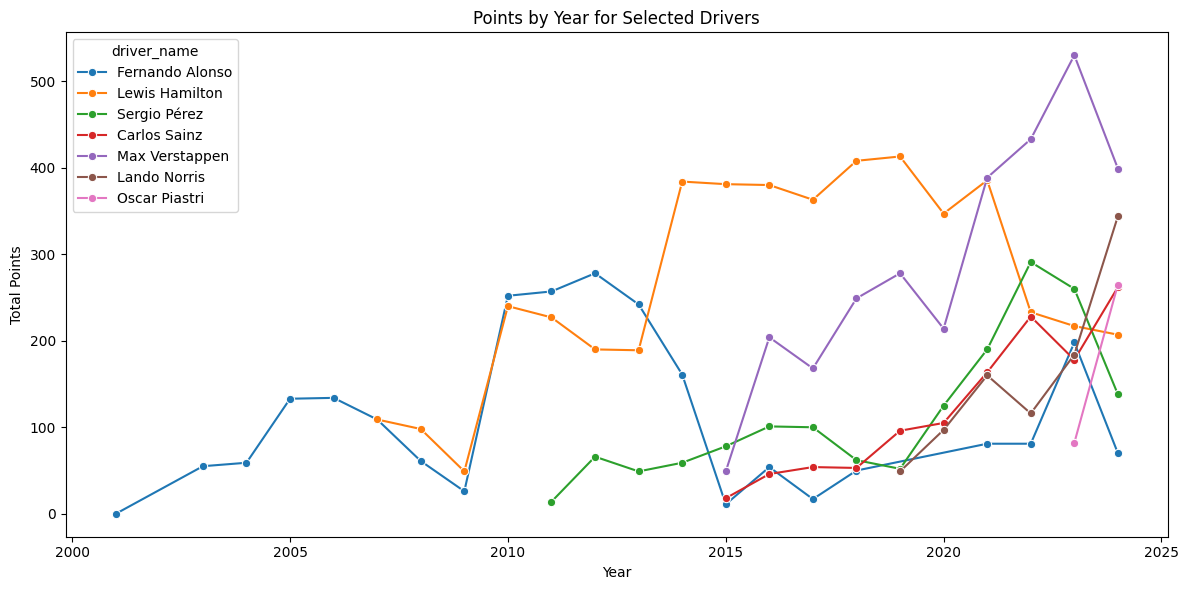

In [ ]:
# convert date if not already
F1_named['date'] = pd.to_datetime(F1_named['date'], errors='coerce')
F1_named['year'] = F1_named['date'].dt.year

# Compare selected drivers over time
target_drivers = ['Lewis Hamilton', 'Max Verstappen', 'Lando Norris',
                  'Oscar Piastri', 'Sergio Pérez', 'Carlos Sainz', 'Fernando Alonso']
seasonal_points = F1_named[F1_named['driver_name'].isin(target_drivers)]

points_by_year = seasonal_points.groupby(['year', 'driver_name'])['points'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=points_by_year, x='year', y='points', hue='driver_name', marker='o')
plt.title('Points by Year for Selected Drivers')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.tight_layout()
plt.show()


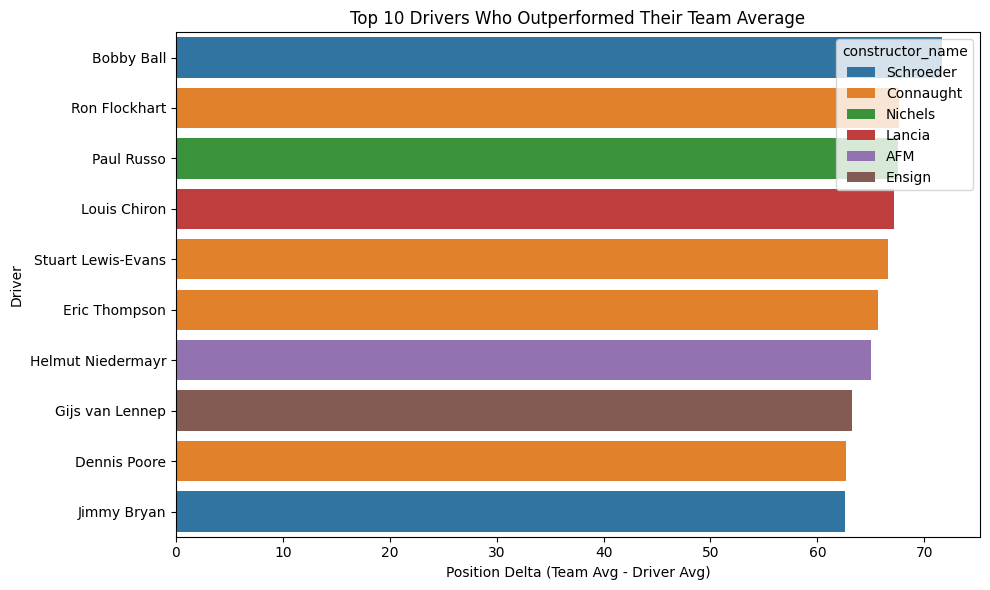

In [29]:
# Step 1: Average final position per driver
driver_perf = F1_named.groupby(['constructor_name', 'driver_name'])['final_position'].mean().reset_index(name='driver_avg_position')

# Step 2: Average final position per team
team_perf = F1_named.groupby('constructor_name')['final_position'].mean().reset_index(name='team_avg_position')

# Step 3: Merge and calculate delta
driver_vs_team = driver_perf.merge(team_perf, on='constructor_name')
driver_vs_team['delta'] = driver_vs_team['team_avg_position'] - driver_vs_team['driver_avg_position']

# Positive delta = driver outperforms team average
# Negative delta = underperformance

# Top 10 outperformers
top_outperformers = driver_vs_team.sort_values('delta', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='delta', y='driver_name', hue='constructor_name', data=top_outperformers)
plt.title('Top 10 Drivers Who Outperformed Their Team Average')
plt.xlabel('Position Delta (Team Avg - Driver Avg)')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()


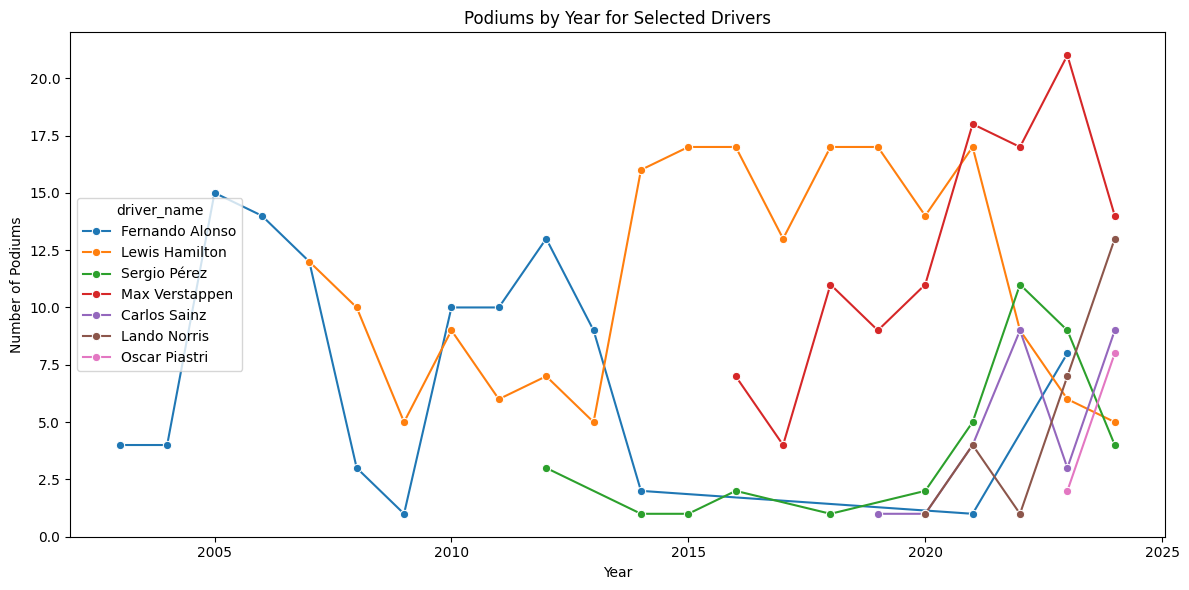

In [30]:
# Add year if not already done
F1_named['year'] = pd.to_datetime(F1_named['date'], errors='coerce').dt.year

# Filter target drivers
target_drivers = ['Lewis Hamilton', 'Max Verstappen', 'Lando Norris',
                  'Oscar Piastri', 'Sergio Pérez', 'Carlos Sainz', 'Fernando Alonso']
podium_data = F1_named[F1_named['driver_name'].isin(target_drivers)]

# Count top-3 finishes (podiums) per year
podium_data = podium_data[podium_data['final_position'] <= 3]
podiums_by_year = podium_data.groupby(['year', 'driver_name']).size().reset_index(name='podium_count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=podiums_by_year, x='year', y='podium_count', hue='driver_name', marker='o')
plt.title('Podiums by Year for Selected Drivers')
plt.xlabel('Year')
plt.ylabel('Number of Podiums')
plt.tight_layout()
plt.show()
